Intrduction:
Toronto is the most populous city, the financial, Educational and technological hub of Canada. Both my Friend and I are relocating to Toronto later this year, and will be staying in Toronto for 2 years. We both really love Japanese food so I would like to stay in a neighbourhood which has some Japanese restaurants, among other things. We have also heard that Toronto has very high real estate rental price, but I do not want to spend much money on rental.

Problem Description:

a. Choosing neighbourhood with low average real estate rental (Our budget is about $1500)
b. Choose neighbourhood with some Japanese restaurants

Solution: 

a. Identify neighbourhood where average real estate rental is low (around $1500)
b. Identify neighbourhood with Japanese's restaurant as a common venue

Target Audience: 

Anybody planning to relocate to Toronto for a short duration, do not want to miss tasty Japanese food and want to save cost on rental expenses. This analysis can be generalised for anybody/ any family planning to relocate to Toronto and wants good variety of a particular restaurant type around them.


Step 1: Downloading required libraries, packages and setting the enviornment

In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)

In [2]:
!conda install -c conda-forge folium --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    folium-0.10.1              |             py_0          59 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTAL

In [3]:
!conda install -c conda-forge geopy --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          92 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0   conda-forge
    geopy:         1.21.0-py_0 conda-forge


geopy-1.21.0         | 58 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [4]:
import time
import geopy
from geopy.geocoders import Nominatim
geopy.geocoders.options.default_timeout = 7
import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Importing to use the Foursquare API lab
import folium # map rendering library

Step 2: Data extration and data cleaning

Data is extarcted from:
a.	Wikipedia page titled ‘List of Postal Codes of Canada_M’ for list of neighbourhoods, boroughs and postal codes in Toronto
b.	Foursquare API for identifying venues, venue categories such as cafes, restaurants
c.	Average real estate rental from Kaggle dataset on average rentals 


In [5]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

In [6]:
dframe_list = pd.io.html.read_html(url)

In [7]:
dframe = dframe_list[0]

In [8]:
dframe.head()

,Postal code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


In [9]:
dframe.dropna(inplace = True)

In [10]:
dframe.head()

,Postal code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
5,M6A,North York,Lawrence Manor / Lawrence Heights
6,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


In [11]:
dframe['Neighborhood'] = dframe['Neighborhood'].str.replace('/',',')
dframe.head()

,Postal code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park , Harbourfront"
5,M6A,North York,"Lawrence Manor , Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government"


In [12]:
dframe['Address'] = dframe['Neighborhood'] + ', ' + dframe['Borough'] + ', ' + 'Toronto, Ontario, Canada'
dframe.head()

,Postal code,Borough,Neighborhood,Address
2,M3A,North York,Parkwoods,"Parkwoods, North York, Toronto, Ontario, Canada"
3,M4A,North York,Victoria Village,"Victoria Village, North York, Toronto, Ontario..."
4,M5A,Downtown Toronto,"Regent Park , Harbourfront","Regent Park , Harbourfront, Downtown Toronto, ..."
5,M6A,North York,"Lawrence Manor , Lawrence Heights","Lawrence Manor , Lawrence Heights, North York,..."
6,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government","Queen's Park , Ontario Provincial Government, ..."


We will now geolocate the neighbourhoods using Geopy Nominatim

In [14]:
geolocator = Nominatim(user_agent="my_app_1")

In [15]:
n = geolocator.geocode('Downtown Toronto, Toronto, Ontario, Canada')
print(n)

Downtown Yonge, Toronto Centre, Old Toronto, Toronto, Golden Horseshoe, Ontario, M5B 2C3, Canada


In [16]:
dframe['Coordinates'] = dframe['Address'].apply(geolocator.geocode)

In [17]:
dframe.head()

,Postal code,Borough,Neighborhood,Address,Coordinates
2,M3A,North York,Parkwoods,"Parkwoods, North York, Toronto, Ontario, Canada","(Parkwoods Village Drive, Parkway East, Don Va..."
3,M4A,North York,Victoria Village,"Victoria Village, North York, Toronto, Ontario...","(Victoria Village, Don Valley East, North York..."
4,M5A,Downtown Toronto,"Regent Park , Harbourfront","Regent Park , Harbourfront, Downtown Toronto, ...",None
5,M6A,North York,"Lawrence Manor , Lawrence Heights","Lawrence Manor , Lawrence Heights, North York,...",None
6,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government","Queen's Park , Ontario Provincial Government, ...",None


In [18]:
dframe['Lat']=dframe['Coordinates'].apply(lambda x: x.latitude if x != None else None)
dframe['Long']=dframe['Coordinates'].apply(lambda x: x.longitude if x != None else None)
dframe.head()

,Postal code,Borough,Neighborhood,Address,Coordinates,Lat,Long
2,M3A,North York,Parkwoods,"Parkwoods, North York, Toronto, Ontario, Canada","(Parkwoods Village Drive, Parkway East, Don Va...",43.758800,-79.320197
3,M4A,North York,Victoria Village,"Victoria Village, North York, Toronto, Ontario...","(Victoria Village, Don Valley East, North York...",43.732658,-79.311189
4,M5A,Downtown Toronto,"Regent Park , Harbourfront","Regent Park , Harbourfront, Downtown Toronto, ...",None,NaN,NaN
5,M6A,North York,"Lawrence Manor , Lawrence Heights","Lawrence Manor , Lawrence Heights, North York,...",None,NaN,NaN
6,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government","Queen's Park , Ontario Provincial Government, ...",None,NaN,NaN


We see nomonatim was unable to reterive latititude and longitude for some neighborhoods, and is reflecting as NaN value.
We will use a predownloaded csv file to fill the gaps

In [19]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ef41cdf2bf8249b297b176d686d8cbcd = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Sc2e5tSltx1aOVg-zLmrXRgARWcKFD82XDSImy8P0M1X',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_ef41cdf2bf8249b297b176d686d8cbcd.get_object(Bucket='project1-donotdelete-pr-ehqzo7uscmawdx',Key='Geospatial_Coordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [20]:
df_data_1.rename(columns= {'Postal Code': 'Postal code'}, inplace = True)
df_data_1.head()

,Postal code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [21]:
dframe_toronto = pd.merge(dframe, df_data_1, on = 'Postal code')
dframe_toronto.head()

,Postal code,Borough,Neighborhood,Address,Coordinates,Lat,Long,Latitude,Longitude
0,M3A,North York,Parkwoods,"Parkwoods, North York, Toronto, Ontario, Canada","(Parkwoods Village Drive, Parkway East, Don Va...",43.758800,-79.320197,43.753259,-79.329656
1,M4A,North York,Victoria Village,"Victoria Village, North York, Toronto, Ontario...","(Victoria Village, Don Valley East, North York...",43.732658,-79.311189,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park , Harbourfront","Regent Park , Harbourfront, Downtown Toronto, ...",None,NaN,NaN,43.654260,-79.360636
3,M6A,North York,"Lawrence Manor , Lawrence Heights","Lawrence Manor , Lawrence Heights, North York,...",None,NaN,NaN,43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government","Queen's Park , Ontario Provincial Government, ...",None,NaN,NaN,43.662301,-79.389494


In [22]:
dframe_toronto['Lat'] = dframe_toronto.apply(lambda row: row['Latitude'] 
                                                  if np.isnan(row['Lat']) else row['Lat'], axis = 1)
dframe_toronto['Long'] = dframe_toronto.apply(lambda row: row['Longitude'] 
                                                  if np.isnan(row['Long']) else row['Long'], axis = 1)
dframe_toronto.head()

,Postal code,Borough,Neighborhood,Address,Coordinates,Lat,Long,Latitude,Longitude
0,M3A,North York,Parkwoods,"Parkwoods, North York, Toronto, Ontario, Canada","(Parkwoods Village Drive, Parkway East, Don Va...",43.758800,-79.320197,43.753259,-79.329656
1,M4A,North York,Victoria Village,"Victoria Village, North York, Toronto, Ontario...","(Victoria Village, Don Valley East, North York...",43.732658,-79.311189,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park , Harbourfront","Regent Park , Harbourfront, Downtown Toronto, ...",None,43.654260,-79.360636,43.654260,-79.360636
3,M6A,North York,"Lawrence Manor , Lawrence Heights","Lawrence Manor , Lawrence Heights, North York,...",None,43.718518,-79.464763,43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government","Queen's Park , Ontario Provincial Government, ...",None,43.662301,-79.389494,43.662301,-79.389494


In [23]:
toronto_data = dframe_toronto[['Postal code', 'Borough', 'Neighborhood', 'Lat', 'Long']]
toronto_data.head()

,Postal code,Borough,Neighborhood,Lat,Long
0,M3A,North York,Parkwoods,43.758800,-79.320197
1,M4A,North York,Victoria Village,43.732658,-79.311189
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494


In [24]:
toronto_data.rename(columns= {'Lat': 'Latitude', 'Long': 'Longitude' }, inplace = True)
toronto_data.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.758800,-79.320197
1,M4A,North York,Victoria Village,43.732658,-79.311189
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494


We will recheck whether there are any null values.

We also see that in some cases neighbourhoods are groupded together, so will split them into new rows.

In [25]:
toronto_data.isnull().sum()

Postal code     0
Borough         0
Neighborhood    0
Latitude        0
Longitude       0
dtype: int64

In [26]:
toronto = (toronto_data.set_index(toronto_data.columns.drop('Neighborhood',1).tolist())
.Neighborhood.str.split(',', expand=True)
.stack()
.reset_index()
.rename(columns={0:'Neighborhood'})
.loc[:, toronto_data.columns]
)

In [27]:
toronto.head()

,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.758800,-79.320197
1,M4A,North York,Victoria Village,43.732658,-79.311189
2,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636
3,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
4,M6A,North York,Lawrence Manor,43.718518,-79.464763


Data set containing neighbourhoods, boroughs in Toronto along with latitude, longitude and postal code.
We will see the total number of neighbourhoods from shape

In [28]:
toronto.shape

(209, 5)

There are 209 neighourhoods in Toronto.

Now we will used Foursquare app to explore venues and venue categories

In [29]:
address = 'Toronto, Ontario, Canada'

geolocator = Nominatim(user_agent="my-app123")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [30]:
CLIENT_ID = 'N1OEDCR1ELOETIWJH4V2IKCSLY204LBSUGU3Z4OS1PE2CBS5'
CLIENT_SECRET = 'H4DOBMIH3E1SH4UIUFEE4OGHQYE23S3FOVLRFEM1WYUACPIH'
VERSION = '20200422'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: N1OEDCR1ELOETIWJH4V2IKCSLY204LBSUGU3Z4OS1PE2CBS5
CLIENT_SECRET:H4DOBMIH3E1SH4UIUFEE4OGHQYE23S3FOVLRFEM1WYUACPIH


In [31]:
# nbr_ungrp = toronto_ungrp

In [32]:
toronto_ungrp = toronto[['Postal code','Borough','Neighborhood','Latitude','Longitude']].reset_index(drop = True)
toronto_ungrp.head()

,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.758800,-79.320197
1,M4A,North York,Victoria Village,43.732658,-79.311189
2,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636
3,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
4,M6A,North York,Lawrence Manor,43.718518,-79.464763


In [33]:
toronto_ungrp.shape

(209, 5)

In [34]:
toronto_ungrp.loc[0]
neighborhood_latitude = np.float(toronto_ungrp.loc[0,['Latitude']].values)
neighborhood_longitude =  np.float(toronto_ungrp.loc[0,['Longitude']].values)

In [35]:
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, latitude, longitude, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=N1OEDCR1ELOETIWJH4V2IKCSLY204LBSUGU3Z4OS1PE2CBS5&client_secret=H4DOBMIH3E1SH4UIUFEE4OGHQYE23S3FOVLRFEM1WYUACPIH&v=20200422&ll=43.6534817,-79.3839347&radius=500&limit=100'

In [36]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ead72fadf2774001ba34826'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bay Street Corridor',
  'headerFullLocation': 'Bay Street Corridor, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 71,
  'suggestedBounds': {'ne': {'lat': 43.6579817045, 'lng': -79.37772678059432},
   'sw': {'lat': 43.6489816955, 'lng': -79.39014261940568}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5227bb01498e17bf485e6202',
       'name': 'Downtown Toronto',
       'location': {'lat': 43.65323167517444,
        'lng': -79.38529600606677,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.65323167517444,
          'lng'

In [37]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [38]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Downtown Toronto,Neighborhood,43.653232,-79.385296
1,Nathan Phillips Square,Plaza,43.652270,-79.383516
2,Eggspectation Bell Trinity Square,Breakfast Spot,43.653144,-79.381980
3,Indigo,Bookstore,43.653515,-79.380696
4,Chatime 日出茶太,Bubble Tea Shop,43.655542,-79.384684


In [39]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [40]:
# type your answer here

toronto_venues = getNearbyVenues(names=toronto_ungrp['Neighborhood'],
                                   latitudes=toronto_ungrp['Latitude'],
                                   longitudes=toronto_ungrp['Longitude']
                                  )



Parkwoods
Victoria Village
Regent Park 
 Harbourfront
Lawrence Manor 
 Lawrence Heights
Queen's Park 
 Ontario Provincial Government
Islington Avenue
Malvern 
 Rouge
Don Mills
Parkview Hill 
 Woodbine Gardens
Garden District
 Ryerson
Glencairn
West Deane Park 
 Princess Gardens 
 Martin Grove 
 Islington 
 Cloverdale
Rouge Hill 
 Port Union 
 Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate 
 Bloordale Gardens 
 Old Burnhamthorpe 
 Markland Wood
Guildwood 
 Morningside 
 West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor 
 Wilson Heights 
 Downsview North
Thorncliffe Park
Richmond 
 Adelaide 
 King
Dufferin 
 Dovercourt Village
Scarborough Village
Fairview 
 Henry Farm 
 Oriole
Northwood Park 
 York University
East Toronto
Harbourfront East 
 Union Station 
 Toronto Islands
Little Portugal 
 Trinity
Kennedy Park 
 Ionview 
 East Birchmount Park
Bayview Village
Do

Now we have the list of all venues around the Toronto neighbourhoods and we will later append them with the data set of neighbourhood we prepared earlier. 
But first, let us create a map of Toronto along with teh neighbourhoods

In [41]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_ungrp['Latitude'], toronto_ungrp['Longitude'], toronto_ungrp['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Now let see the number of venues we got from Foursquare 

In [42]:
print(toronto_venues.shape)
toronto_venues.head()

(5184, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.7588,-79.320197,Allwyn's Bakery,43.759840,-79.324719,Caribbean Restaurant
1,Parkwoods,43.7588,-79.320197,LCBO,43.757774,-79.314257,Liquor Store
2,Parkwoods,43.7588,-79.320197,Petro-Canada,43.757950,-79.315187,Gas Station
3,Parkwoods,43.7588,-79.320197,Shoppers Drug Mart,43.760857,-79.324961,Pharmacy
4,Parkwoods,43.7588,-79.320197,Pizza Pizza,43.760231,-79.325666,Pizza Place


There are 5184 venues as see from the shape. let us now group this by neighbourhoods

In [43]:
toronto_grpd = toronto_venues.groupby('Neighborhood')
toronto_grpd.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.758800,-79.320197,Allwyn's Bakery,43.759840,-79.324719,Caribbean Restaurant
1,Parkwoods,43.758800,-79.320197,LCBO,43.757774,-79.314257,Liquor Store
2,Parkwoods,43.758800,-79.320197,Petro-Canada,43.757950,-79.315187,Gas Station
3,Parkwoods,43.758800,-79.320197,Shoppers Drug Mart,43.760857,-79.324961,Pharmacy
4,Parkwoods,43.758800,-79.320197,Pizza Pizza,43.760231,-79.325666,Pizza Place
13,Victoria Village,43.732658,-79.311189,Armenian Kitchen,43.731071,-79.305390,Middle Eastern Restaurant
14,Victoria Village,43.732658,-79.311189,Jatujak,43.736208,-79.307668,Thai Restaurant
15,Victoria Village,43.732658,-79.311189,TTC Bus #24 Victoria Park Ave,43.735197,-79.306977,Bus Line
16,Victoria Village,43.732658,-79.311189,Artistic Nails,43.736120,-79.308080,Spa
17,Regent Park,43.654260,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery


We will use onhot encoding to encode and use later for further analysis

In [44]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hospital,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Paintball Field,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Lab,Pie Shop,Pilates Studio,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Tree,Turkish Restaurant,Un

In [45]:
toronto_grpd = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grpd.head()
toronto_grpd.shape

(194, 288)

In [46]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

let is now find the 5 most common venue for each neighbourhood

In [47]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grpd['Neighborhood']

for ind in np.arange(toronto_grpd.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grpd.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Adelaide,Coffee Shop,Café,Restaurant,Deli / Bodega,Gym
1,Agincourt North,Playground,Coffee Shop,Park,Women's Store,Eastern European Restaurant
2,Albion Gardens,Grocery Store,Pharmacy,Coffee Shop,Beer Store,Fried Chicken Joint
3,Bathurst Quay,Airport Service,Airport Lounge,Airport Terminal,Boat or Ferry,Rental Car Location
4,Beaumond Heights,Grocery Store,Pharmacy,Coffee Shop,Beer Store,Fried Chicken Joint


In [48]:
toronto_merged = toronto_ungrp
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,Postal code,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M3A,North York,Parkwoods,43.758800,-79.320197,Liquor Store,Coffee Shop,Bank,Gas Station,Laundry Service
1,M4A,North York,Victoria Village,43.732658,-79.311189,Thai Restaurant,Spa,Middle Eastern Restaurant,Bus Line,Women's Store
2,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636,Coffee Shop,Bakery,Park,Pub,Breakfast Spot
3,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636,Coffee Shop,Bakery,Park,Pub,Breakfast Spot
4,M6A,North York,Lawrence Manor,43.718518,-79.464763,Clothing Store,Furniture / Home Store,Women's Store,Coffee Shop,Arts & Crafts Store


Not finally, let us check the data on real estate rental of Toronto neighbourhoods

In [49]:

body = client_ef41cdf2bf8249b297b176d686d8cbcd.get_object(Bucket='project1-donotdelete-pr-ehqzo7uscmawdx',Key='Toronto_apartment_rentals.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()


,Address,Lat,Long,Price,Postal code
0,"361 Front St W, Toronto, ON M5V 3R5,",43.643051,-79.391643,2150.0,M5V
1,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,1950.0,M5B
2,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,2900.0,M5J
3,"80 St Patrick St, Toronto, ON M5T 2X6,",43.652487,-79.389622,1800.0,M5T
4,"87 Jameson Avenue, Toronto, ON, M6K 2W8",43.634890,-79.434654,1729.0,M6K


In [50]:
rental = df_data_0.iloc[:, 3:]
rental.head()

,Price,Postal code
0,2150.0,M5V
1,1950.0,M5B
2,2900.0,M5J
3,1800.0,M5T
4,1729.0,M6K


Step 3: Exploratory Analysis
    
let us explore the data on real estate rental and venues 

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
rental.rename(columns= {'Price': 'Avg. Rental'}, inplace = True)

In [53]:
rental_2 = rental.groupby(['Postal code']).mean()
rental_2.shape

(67, 1)

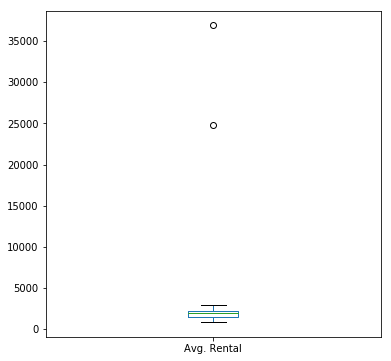

In [55]:
rental_2.plot(kind = 'box', figsize = (6,6))
plt.show()

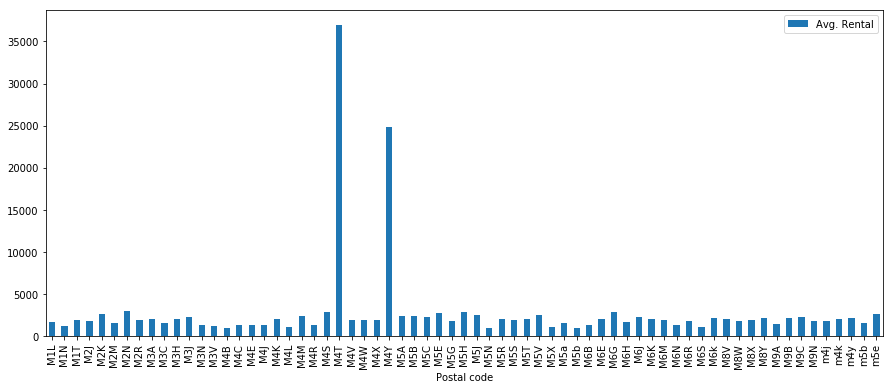

In [56]:
rental_2.plot.bar(figsize = (15,6))

In [57]:
from statistics import stdev

In [58]:
rental_s = rental.iloc[:,0:1]
rental_s.head()

,Avg. Rental
0,2150.0
1,1950.0
2,2900.0
3,1800.0
4,1729.0


In [59]:
print('The average real estate rental in Toronto neighborhoods is $ %.2f ' %rental_s.mean())
print('The median real estate rental in Toronto neighborhoods is $ %.2f ' %rental_s.median())
print('The standard deviation of real estate rental in Toronto neighborhoods is $ %.2f ' %rental_s.std())
print('The skewness of real estate rental in Toronto neighborhoods is %.2f ' %rental_s.skew())
print('The kurtosis deviation of real estate rental in Toronto neighborhoods is %.2f ' %rental_s.kurtosis())

The average real estate rental in Toronto neighborhoods is $ 4243.58 
The median real estate rental in Toronto neighborhoods is $ 2200.00 
The standard deviation of real estate rental in Toronto neighborhoods is $ 31902.64 
The skewness of real estate rental in Toronto neighborhoods is 16.58 
The kurtosis deviation of real estate rental in Toronto neighborhoods is 274.21 


In [60]:
toronto_onehot2 = pd.get_dummies(toronto_merged[['1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue', '4th Most Common Venue', 
'5th Most Common Venue']], prefix="", prefix_sep="")

toronto_onehot2.head()

,Airport Service,American Restaurant,Antique Shop,Auto Garage,Bakery,Bank,Bar,Baseball Field,Beach,Bus Station,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Discount Store,Fast Food Restaurant,Gas Station,General Entertainment,Grocery Store,History Museum,Hockey Arena,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Liquor Store,Massage Studio,Nightclub,Park,Pharmacy,Pizza Place,Playground,Restaurant,River,Skating Rink,Sushi Restaurant,Thai Restaurant,Turkish Restaurant,Yoga Studio,Accessories Store,Afghan Restaurant,Airport Lounge,Aquarium,Asian Restaurant,Athletics & Sports,Bagel Shop,Bakery,Bank,Bus Line,Café,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Cosmetics Shop,Discount Store,Fast Food Restaurant,Field,Fish Market,Furniture / Home Store,Garden,Garden Center,Grocery Store,Gym,Hobby Shop,Hotel,Italian Restaurant,Japanese Restaurant,Juice Bar,Mexican Restaurant,Miscellaneous Shop,Motel,Nightclub,Park,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Pub,Recreation Center,Restaurant,Sandwich Place,Smoke Shop,Spa,Sushi Restaurant,Tibetan Restaurant,Train Station,Women's Store,Airport Terminal,Bagel Shop,Bakery,Bank,Bar,Beer Bar,Breakfast Spot,Café,Coffee Shop,Comic Shop,Construction & Landscaping,Cosmetics Shop,Diner,Discount Store,Distribution Center,Dog Run,Electronics Store,Fast Food Restaurant,Fish Market,Food Court,Gas Station,Gastropub,Grocery Store,Gym,Hotel,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Men's Store,Metro Station,Middle Eastern Restaurant,Mobile Phone Shop,Park,Pharmacy,Pizza Place,Restaurant,Sandwich Place,Seafood Restaurant,Shopping Mall,Skating Rink,Smoke Shop,Soccer Field,Spa,Sporting Goods Shop,Sushi Restaurant,Tennis Court,Thai Restaurant,Vietnamese Restaurant,Women's Store,Yoga Studio,American Restaurant,Arts & Crafts Store,BBQ Joint,Bakery,Bank,Basketball Court,Beer Store,Boat or Ferry,Breakfast Spot,Burrito Place,Bus Line,Bus Stop,Café,Caribbean Restaurant,Chinese Restaurant,Coffee Shop,College Stadium,Comfort Food Restaurant,Convenience Store,Dance Studio,Deli / Bodega,Diner,Discount Store,Distribution Center,Dive Bar,Donut Shop,Eastern European Restaurant,Fast Food Restaurant,Fried Chicken Joint,Furniture / Home Store,Gas Station,Hotel,Ice Cream Shop,Intersection,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Men's Store,Metro Station,Middle Eastern Restaurant,Park,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Pub,Restaurant,Sandwich Place,Seafood Restaurant,Shopping Mall,Supermarket,Tanning Salon,Thai Restaurant,Thrift / Vintage Store,Trail,Train Station,Vietnamese Restaurant,Women's Store,American Restaurant,Arts & Crafts Store,Asian Restaurant,Bakery,Bar,Breakfast Spot,Brewery,Bubble Tea Shop,Business Service,Café,Cantonese Restaurant,Chinese Restaurant,Cocktail Bar,Coffee Shop,Comic Shop,Convenience Store,Dance Studio,Department Store,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Eastern European Restaurant,Electronics Store,Fast Food Restaurant,Fried Chicken Joint,Gas Station,Gastropub,Grocery Store,Gym,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Laundry Service,Light Rail Station,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Ramen Restaurant,Recording Studio,Rental Car Location,Restaurant,Sandwich Place,Scenic Lookout,Shopping Mall,Skating Rink,Supermarket,Supplement Shop,Sushi Restaurant,Vegetarian / Vegan Restaurant,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [61]:
toronto_g = toronto_onehot2.sum().sort_values(ascending = False)

In [62]:
toronto_g2 = toronto_g.loc[toronto_g > 4]

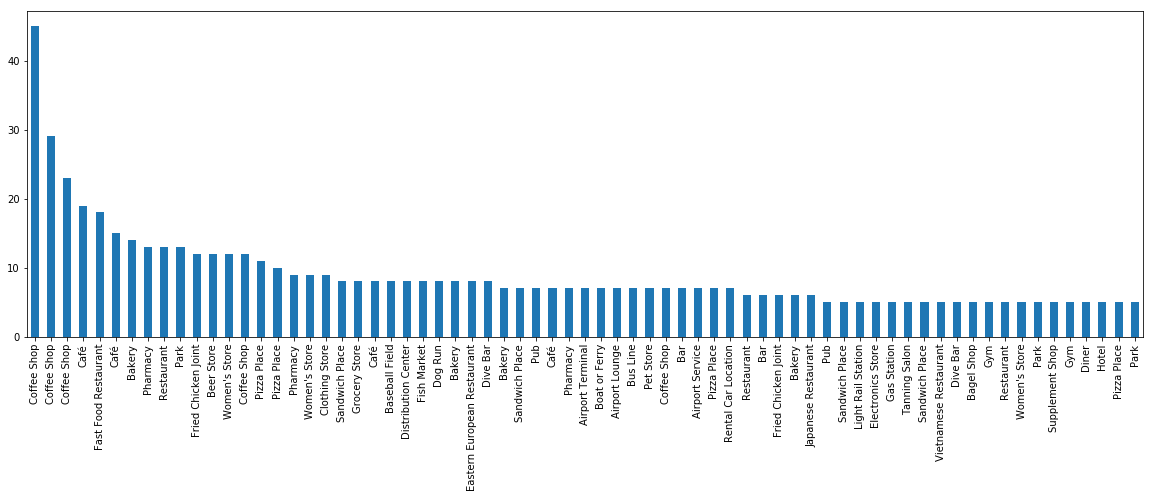

In [63]:
toronto_g2.plot(kind = 'bar', figsize = (20,6))

Step 4: Final Analysis
    
We will identify teh neighbpurhood we will locate to based on the below analysis

In [64]:
toronto_merged.head()

,Postal code,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M3A,North York,Parkwoods,43.758800,-79.320197,Liquor Store,Coffee Shop,Bank,Gas Station,Laundry Service
1,M4A,North York,Victoria Village,43.732658,-79.311189,Thai Restaurant,Spa,Middle Eastern Restaurant,Bus Line,Women's Store
2,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636,Coffee Shop,Bakery,Park,Pub,Breakfast Spot
3,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636,Coffee Shop,Bakery,Park,Pub,Breakfast Spot
4,M6A,North York,Lawrence Manor,43.718518,-79.464763,Clothing Store,Furniture / Home Store,Women's Store,Coffee Shop,Arts & Crafts Store


In [65]:
toronto_merged.shape

(209, 10)

In [67]:
rental_2.shape

(67, 1)

Let us create a unified data set which has the data points required i.e.
name of the neighbour, 5 most common venues, average rental and locational coordinates to map in folio.

In [68]:
toronto_res = toronto_merged.merge(rental_2, on = 'Postal code')
toronto_res.head()

,Postal code,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Avg. Rental
0,M3A,North York,Parkwoods,43.758800,-79.320197,Liquor Store,Coffee Shop,Bank,Gas Station,Laundry Service,2000.000000
1,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636,Coffee Shop,Bakery,Park,Pub,Breakfast Spot,2364.661538
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636,Coffee Shop,Bakery,Park,Pub,Breakfast Spot,2364.661538
3,M9A,Etobicoke,Islington Avenue,43.622575,-79.514215,Restaurant,Coffee Shop,Sporting Goods Shop,BBQ Joint,Italian Restaurant,1475.000000
4,M4B,East York,Parkview Hill,43.706397,-79.309937,Pizza Place,Pharmacy,Intersection,Breakfast Spot,Pet Store,1000.000000


Let us now sort the neighborhoods based on prices

In [70]:
toronto_res.sort_values(by = ['Avg. Rental'])
toronto_res.head()

,Postal code,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Avg. Rental
0,M3A,North York,Parkwoods,43.758800,-79.320197,Liquor Store,Coffee Shop,Bank,Gas Station,Laundry Service,2000.000000
1,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636,Coffee Shop,Bakery,Park,Pub,Breakfast Spot,2364.661538
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636,Coffee Shop,Bakery,Park,Pub,Breakfast Spot,2364.661538
3,M9A,Etobicoke,Islington Avenue,43.622575,-79.514215,Restaurant,Coffee Shop,Sporting Goods Shop,BBQ Joint,Italian Restaurant,1475.000000
4,M4B,East York,Parkview Hill,43.706397,-79.309937,Pizza Place,Pharmacy,Intersection,Breakfast Spot,Pet Store,1000.000000


let us know now identify only those neighbourhoods which has Japanese Resturant as common venue and sort by average rental

In [71]:
toronto_res[toronto_res.apply(lambda row: row.astype(str).str.contains('Japanese Restaurant').any(), axis = 1)].sort_values(by = 'Avg. Rental')

,Postal code,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Avg. Rental
110,M5X,Downtown Toronto,First Canadian Place,43.648429,-79.382280,Coffee Shop,Café,Hotel,Restaurant,Japanese Restaurant,1100.000000
111,M5X,Downtown Toronto,Underground city,43.648429,-79.382280,Coffee Shop,Café,Hotel,Restaurant,Japanese Restaurant,1100.000000
8,M6B,North York,Glencairn,43.708712,-79.440685,Japanese Restaurant,Playground,Tennis Court,Pub,Grocery Store,1300.000000
14,M3C,North York,Don Mills,43.775347,-79.345944,Clothing Store,Coffee Shop,Restaurant,Japanese Restaurant,Fast Food Restaurant,1516.666667
70,M2R,North York,Willowdale,43.761510,-79.410923,Coffee Shop,Japanese Restaurant,Grocery Store,Pharmacy,Restaurant,1867.000000
78,M5S,Downtown Toronto,University of Toronto,43.662696,-79.400049,Café,Bakery,Italian Restaurant,Japanese Restaurant,Bar,1946.076923
79,M5S,Downtown Toronto,Harbord,43.662696,-79.400049,Café,Bakery,Italian Restaurant,Japanese Restaurant,Bar,1946.076923
58,M4M,East Toronto,Studio District,43.649585,-79.390683,Coffee Shop,Cosmetics Shop,Japanese Restaurant,Café,Vegetarian / Vegan Restaurant,2366.666667
64,M2N,North York,Willowdale,43.761510,-79.410923,Coffee Shop,Japanese Restaurant,Grocery Store,Pharmacy,Restaurant,3000.000000
115,M4Y,Downtown Toronto,Church and Wellesley,43.661195,-79.382114,Coffee Shop,Japanese Restaurant,Diner,Sandwich Place,Ramen Restaurant,24853.169014


11 Neighbourhood of Toronto where Japanese Restaurants featured in top 5 venue category, with average real estate rental ranging from $1100 to $24853.16

In [124]:
toronto_res_m = toronto_res[toronto_res.apply(lambda row: row.astype(str).str.contains('Japanese Restaurant').any(), axis = 1)].sort_values(by = 'Avg. Rental')
toronto_res_m.shape

(10, 11)

In [73]:
map_toronto_res = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_res['Latitude'], toronto_res['Longitude'], toronto_res['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_res)  
    
map_toronto_res

Step 5: Final decision:
11 Neighbourhood of Toronto where Japanese Restaurants featured in top 5 venue category, with average real estate rental ranging from $1100 to $24853.16

It can be seen Don Mills neighborhood in North York borough fits both the criteria stated in problem description and solution:

    1. Japanese Restaurants as top 3 most common venue
    2. Average rental price of $ 1516.66
